In [14]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [44]:
!cat balloons.names

1. Title: Balloon databases

2. Source: Michael Pazzani (pazzani@ics.uci.edu)

3. Past usage
   Pazzani, M. (1991). The influence of prior knowledge on concept acquisition: 
   Experimental and computational results. Journal of Experimental Psychology: 
   Learning, Memory & Cognition, 17, 3,  416-432.

4. Relevant information:
   There are four data sets representing different conditions of an experiment.
   All have the same attributes.
   a. adult-stretch.data  Inflated is true if age=adult or act=stretch
   b. adult+stretch.data  Inflated is true if age=adult and act=stretch
   c. small-yellow.data   Inflated is true if (color=yellow and size = small) or
   d. small-yellow+adult-stretch.data  Inflated is true if 
            (color=yellow and size = small) or (age=adult and act=stretch)
 
5. Number of attributes: 4

6. Number of Instances: 16

7. Attribute Information: (Classes Inflated T or F)
   Color             yellow, purple
   size              large, small
   act            

In [6]:
df = pd.read_csv('./yellow-small+adult-stretch.data', names=['color','size','act','age','inflated'])
df.shape

(16, 5)

In [7]:
df.head()

,color,size,act,age,inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,T
4,YELLOW,LARGE,STRETCH,ADULT,T


In [8]:
for col in df.columns:
    print('->', col, df[col].unique())

-> color ['YELLOW' 'PURPLE']
-> size ['SMALL' 'LARGE']
-> act ['STRETCH' 'DIP']
-> age ['ADULT' 'CHILD']
-> inflated ['T' 'F']


In [10]:
df.describe().T

,count,unique,top,freq
color,16,2,YELLOW,8
size,16,2,SMALL,8
act,16,2,STRETCH,8
age,16,2,ADULT,8
inflated,16,2,F,9


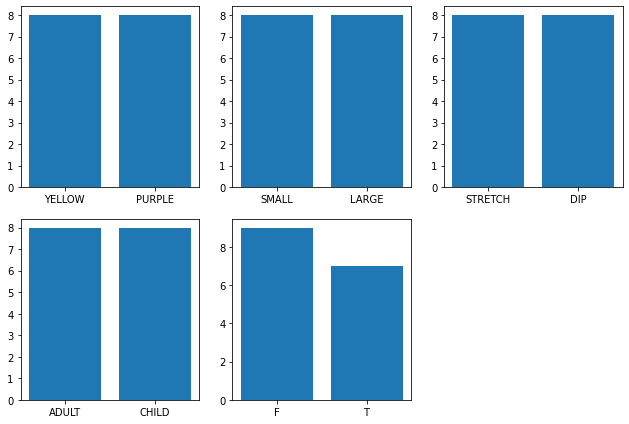

In [48]:
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(9,6))
ax = ax.ravel()
for i in range(5):
    col = df.columns[i]
    ctr = df[col].value_counts()
    ax[i].bar(ctr.index, ctr)
plt.tight_layout()
fig.delaxes(ax[5])

In [49]:
df.columns

Index(['color', 'size', 'act', 'age', 'inflated'], dtype='object')

In [51]:
cross = pd.crosstab(df['age'], df['inflated'])
cross

inflated,F,T
age,,
ADULT,3,5
CHILD,6,2


In [52]:
import scipy.stats as st

In [53]:
st.chi2_contingency(cross)

(1.0158730158730158,
 0.31349994558358524,
 1,
 array([[4.5, 3.5],
        [4.5, 3.5]]))

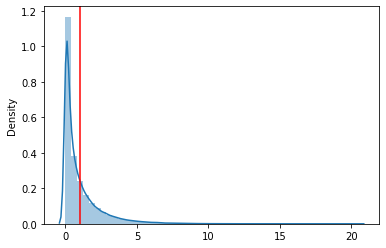

In [66]:
sns.distplot(np.random.chisquare(1,size=100000));
plt.axvline(1.0158730158730158, color='r');